In [1]:
# Import data analysis and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
# Read the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
print('Type of read object is: ',type(df),'\n\n')
df.info()
# Now remove whitespaces in the column-names
df.columns = df.columns.str.strip()

Type of read object is:  <class 'pandas.core.frame.DataFrame'> 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [21]:
# Creating a new Dataframe and renaming columns...
spam = pd.DataFrame()
spam['class'] = df['v1']
spam['text'] = df['v2']
spam.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
# Adding column length to our dataframe...
spam['length'] = spam['text'].apply(len)
# We cspam.head()

In [23]:
# We can see that length can be distingushtable feature
spam.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


(array([1.167e+03, 1.669e+03, 8.640e+02, 5.070e+02, 6.990e+02, 5.290e+02,
        4.100e+01, 2.400e+01, 1.400e+01, 2.400e+01, 9.000e+00, 2.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.        ,  32.26666667,  62.53333333,  92.8       ,
        123.06666667, 153.33333333, 183.6       , 213.86666667,
        244.13333333, 274.4       , 304.66666667, 334.93333333,
        365.2       , 395.46666667, 425.73333333, 456.        ,
        486.26666667, 516.53333333, 546.8       , 577.06666667,
        607.33333333, 637.6       , 667.86666667, 698.13333333,
        728.4       , 758.66666667, 788.93333333, 819.2       ,
        849.46666667, 879.73333333, 910.        ]),
 <a list of 30 Patch objects>)

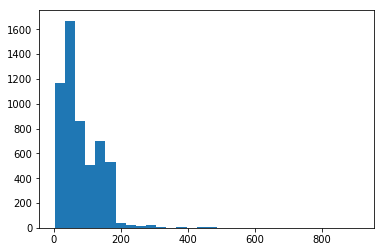

In [24]:
plt.hist(spam['length'], bins= 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x124d3662588>,
 'caps': [<matplotlib.lines.Line2D at 0x124d3662c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x124d365be48>],
 'medians': [<matplotlib.lines.Line2D at 0x124d36692e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x124d3669630>],
 'means': []}

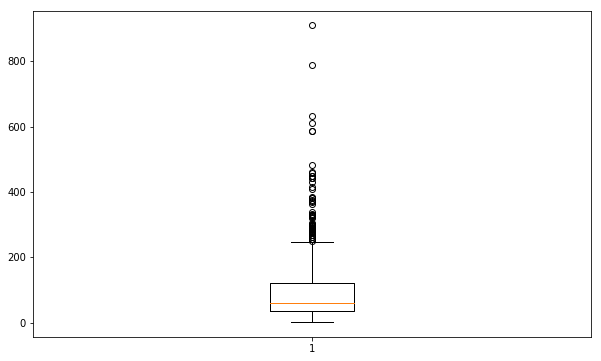

In [25]:
#plt.figure(figsize=(10,6))
plt.boxplot(spam['length'])

### From the above data and graph, we assure that length of SMS can distinguish spam SMS and there are outliers which needs to be removed...

{'whiskers': [<matplotlib.lines.Line2D at 0x124d369e7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x124d369ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x124d369e080>],
 'medians': [<matplotlib.lines.Line2D at 0x124d36a4518>],
 'fliers': [<matplotlib.lines.Line2D at 0x124d36a4860>],
 'means': []}

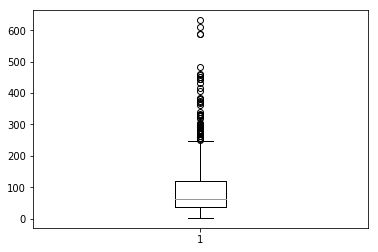

In [26]:
spam = spam[spam['length']<700]
plt.boxplot(spam['length'])

In [31]:
# This statement helps to know how many spam n non-spam msgs are present...
spam.groupby('class').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4823.0   70.700601  55.803010   2.0   33.0   52.0   92.0  632.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [39]:
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords
def preprocess_text_msgs(text):
    my_str = [c for c in text if c not in string.punctuation]
    my_str = ''.join(my_str)
    #print(len(my_str))
    msg=[word for word in my_str.split() if word.lower() not in stop_words.ENGLISH_STOP_WORDS]
    return " ".join(msg)
# for e.g.
print('Before removing punc and stopwords: ',len(spam['text'][0]))
print('After removing punc and stopwords: ',len(preprocess_text_msgs(spam['text'][0])))

Before removing punc and stopwords:  111
After removing punc and stopwords:  79


In [53]:
vct = TfidfVectorizer('english')
message = vct.fit_transform(emails)
msg_train, msg_test, label_train, label_test =train_test_split(spam['text'], spam['class'], test_size=0.3, random_state=42)

In [57]:
todo_models = [RandomForestClassifier(max_depth=6), LogisticRegression(), MultinomialNB(), SVC(), GradientBoostingClassifier()]
model_names = ['RandomForestClassifier','LogisticRegression', 'MultinomialNB', 'SVC(Support Vector Machines)', 'GradientBoostingClassifier']
i=0
best_accuracy = 0
best_model = 0
for model in todo_models:
    pipeline = Pipeline([('baggingWords', CountVectorizer(analyzer=preprocess_text_msgs)),
                         ('tfidf', TfidfTransformer()),
                         ('classifier', model)])
    pipeline.fit(msg_train, label_train)
    pred = pipeline.predict(msg_test)
    print('Model : ',model_names[i])
    acc = accuracy_score(label_test,pred)
    print('Accuracy score is:',acc,'\n')
    if best_accuracy < acc:
        best_accuracy = acc
        best_model = i
    i+=1
    #print('Confusion matrix is:\n',confusion_matrix(label_test,pred),'\n')
    #print('Classification report is: \n',classification_report(label_test,pred),'\n')
print('Best model is: ',model_names[best_model], 'with accuracy Score: ',best_accuracy)    
    

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model :  RandomForestClassifier
Accuracy score is: 0.9766606822262118 



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model :  LogisticRegression
Accuracy score is: 0.9748653500897666 

Model :  MultinomialNB
Accuracy score is: 0.9515260323159784 



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model :  SVC(Support Vector Machines)
Accuracy score is: 0.9628964691801316 

Model :  GradientBoostingClassifier
Accuracy score is: 0.9790544584081389 

Best model is:  GradientBoostingClassifier with accuracy Score:  0.9790544584081389
